# **(S)ARIMA univariate model for the prediction of meteorological time series data.**

# LIBRARIES

In [14]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas import DataFrame

from math import sqrt
from matplotlib import pyplot
from datetime import datetime
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg # AR
from statsmodels.tsa.arima.model import ARIMA #ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, mean_absolute_percentage_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
# plt.style.use('bmh')
plt.style.use('default')

# DATA EXPLORATION

In [15]:
# // read the csv file and store it in DataFrame -> data_csv object
path = '/content/drive/MyDrive/Colab Notebooks/THESIS MODELS ML/DATASET_TESIS/TIME-SERIES-Diario-13-23.csv'
# path = '/content/drive/MyDrive/Colab Notebooks/THESIS MODELS ML/DATASET_TESIS/TIME-SERIES-Mensual-86-23.csv'
data = pd.read_csv(path, delimiter=',', index_col='Fecha', header=0, parse_dates=True)
data

,Año,Mes,Dia,Tｰ Media,TｰMaxima,TｰMinima,Lluvia,%Humedad
Fecha,,,,,,,,
2013-01-01,2013,Ene,1,12.038,18.022,7.344,0.956,73.676
2013-01-02,2013,Ene,2,12.224,18.000,8.078,3.600,74.553
2013-01-03,2013,Ene,3,11.902,17.822,7.667,9.933,76.719
2013-01-04,2013,Ene,4,10.906,16.778,7.122,8.800,79.117
2013-01-05,2013,Ene,5,11.146,16.267,7.211,4.956,79.746
...,...,...,...,...,...,...,...,...
2023-08-15,2023,Ago,15,10.306,18.840,3.220,0.000,62.130
2023-08-16,2023,Ago,16,10.577,19.060,3.260,0.000,60.487
2023-08-17,2023,Ago,17,10.377,18.620,3.200,0.120,59.871


In [16]:
# RENAME COLUMNS NAME
data = data.rename(columns={"Tｰ Media": "Temp_media", "TｰMaxima": "Temp_max", "TｰMinima": "Temp_min", "Lluvia": "Precipitacion", "%Humedad": "Humedad"})
data = data.drop(["Año", "Mes", "Dia", "Temp_media", "Precipitacion", "Temp_min", "Humedad"], axis=1)
# data = data.drop(["Año", "Mes", "Dia", "Temp_media"], axis=1) # MONTHLY DATA
data

,Temp_max
Fecha,
2013-01-01,18.022
2013-01-02,18.000
2013-01-03,17.822
2013-01-04,16.778
2013-01-05,16.267
...,...
2023-08-15,18.840
2023-08-16,19.060
2023-08-17,18.620


## DATA ANALYSIS

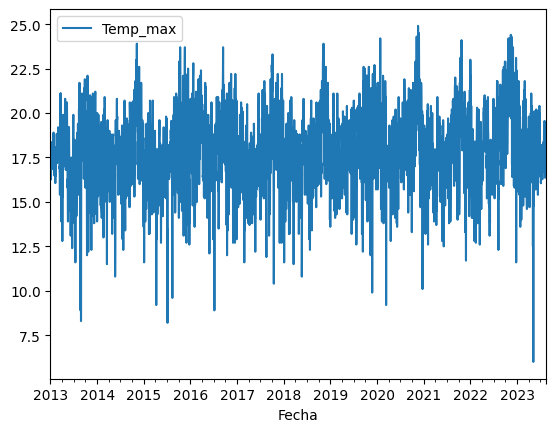

In [18]:
data.plot()
pyplot.show()

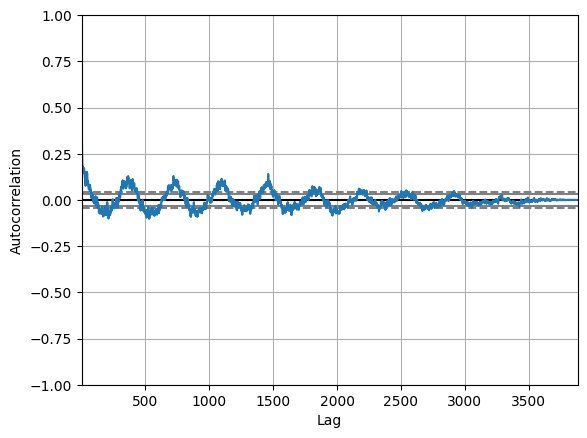

In [19]:
autocorrelation_plot(data)
pyplot.show()

In [9]:
data.index = data.index.to_period('D')
data

,Temp_max
Fecha,
2013-01-01,18.022
2013-01-02,18.000
2013-01-03,17.822
2013-01-04,16.778
2013-01-05,16.267
...,...
2023-08-15,18.840
2023-08-16,19.060
2023-08-17,18.620


# SARIMA

## DATA SPLIT

In [20]:
# split into train and test sets
X = data
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

## MODEL SETUP

In [21]:
model = SARIMAX(train['Temp_max'], order=(2, 0, 1),seasonal_order=(2,1,2,15))
model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


U FREE TO CHANGE THE VALUE PARAMS FOR EACH DATASET

In [22]:
# summary of fit model
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                Temp_max   No. Observations:                 2912
Model:             SARIMAX(2, 0, 1)x(2, 1, [1, 2], 15)   Log Likelihood               -5724.981
Date:                                 Thu, 03 Jul 2025   AIC                          11465.962
Time:                                         14:52:42   BIC                          11513.733
Sample:                                     01-01-2013   HQIC                         11483.176
                                          - 12-21-2020                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4595      0.020     72.840      0.000       1.420       1

In [23]:
# make prediction
pred_SARIMA = model.predict(len(train.Temp_max),len(test.Temp_max)+len(train.Temp_max)-1)
print(pred_SARIMA)

2020-12-22    19.473802
2020-12-23    19.451841
2020-12-24    19.334057
2020-12-25    19.203562
2020-12-26    19.286295
                ...    
2023-08-15    17.955529
2023-08-16    17.855441
2023-08-17    18.213748
2023-08-18    18.291697
2023-08-19    18.295433
Freq: D, Name: predicted_mean, Length: 971, dtype: float64


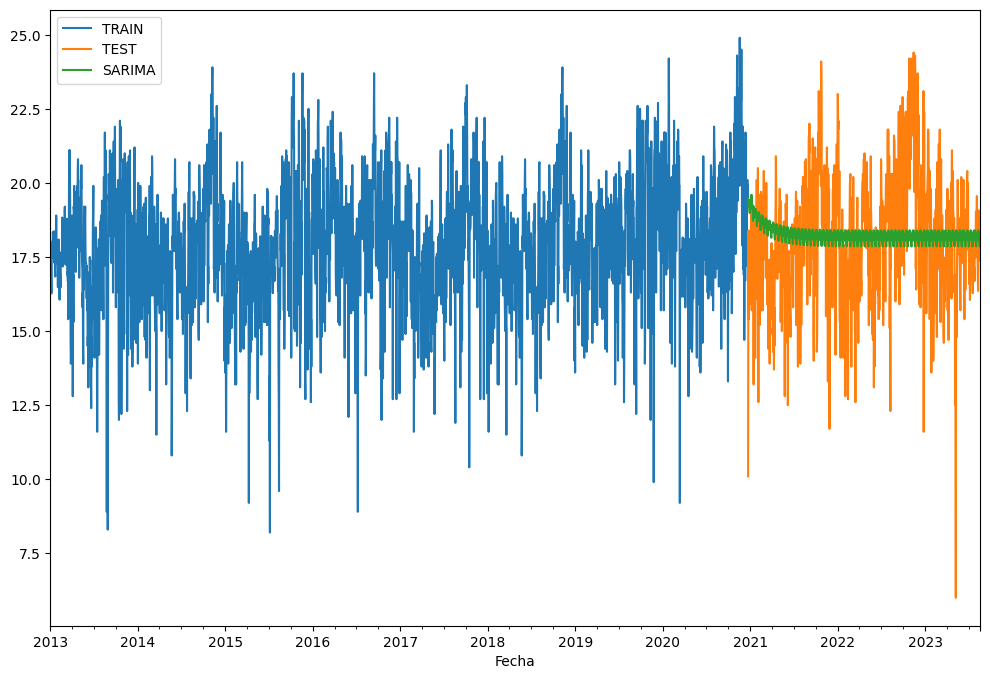

In [24]:
# PLOT FORECASTING
train['Temp_max'].plot(legend=True, label='TRAIN')
test['Temp_max'].plot(legend=True, label='TEST', figsize=(12,8))
pred_SARIMA.plot(legend=True, label='SARIMA');

<Axes: xlabel='Fecha'>

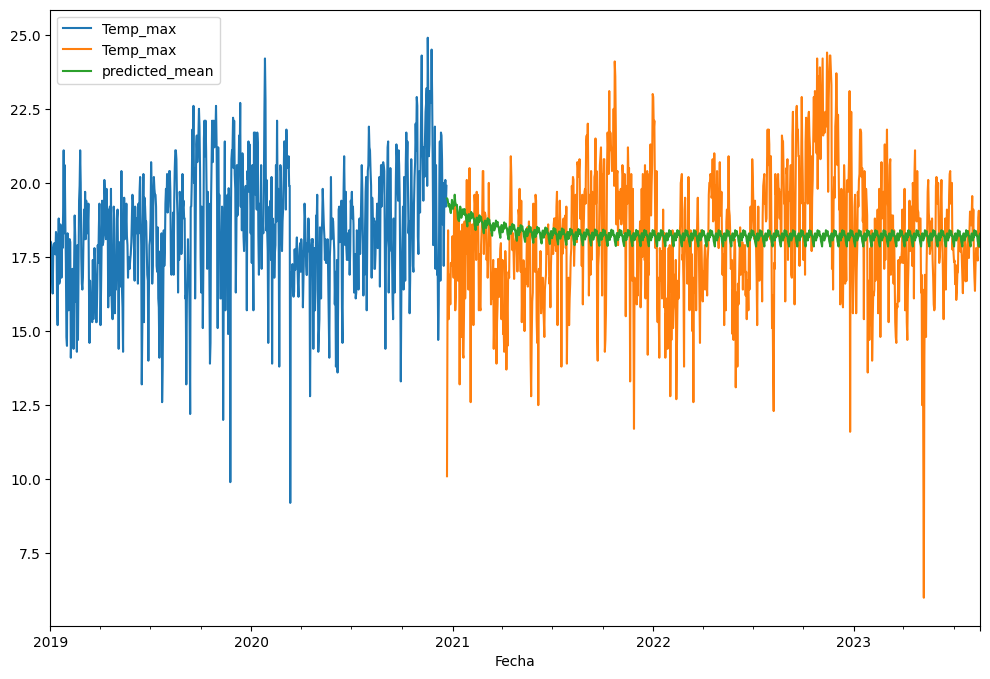

In [25]:
#Visualization
train['Temp_max']['2019-01-01':].plot(figsize = (12,8), legend = True)
test['Temp_max'].plot( legend = True)
pred_SARIMA.plot(legend = True)

In [26]:
# print('Additive Model Evaluation')
# Calculate the metrics
mae = mean_absolute_error(test['Temp_max'], pred_SARIMA)
rmse = mean_squared_error(test['Temp_max'], pred_SARIMA) ** 0.5
mse = mean_squared_error(test['Temp_max'], pred_SARIMA)
mape = mean_absolute_percentage_error(test['Temp_max'], pred_SARIMA) * 100

# Format the output with f-strings for readability and control over precision
print(f"MAE : {mae:.2f}")  # Display MAE with 3 decimal places
print(f"MSE: {mse:.2f}")  # Display RMSE with 3 decimal places
print(f"RMSE: {rmse:.2f}")  # Display RMSE with 3 decimal places
print(f"MAPE: {mape:.2f}%")  # Display MAPE with 3 decimal places and percentage sign

MAE : 1.73
MSE: 4.95
RMSE: 2.23
MAPE: 9.93%
